In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
# C'est un DataFrame
data = pd.read_excel('data\\titanic3.xls')
newdata = data

In [4]:
data.shape

(1309, 14)

In [5]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat' , 'body' , 'home.dest'],axis=1)

In [8]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [9]:
# Les statistique de base pour chaque colonne
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [10]:
# La fonction << fillna >> permet de remplacer les valeur manquantes par une valeur par defaut mais sa va corompre les donne
# la deuxieme option est de supprimer toute les ligne qui ont des valeurs manquantes
#  data.fillna(data['age'].mean())
data = data.dropna(axis=0)  # la meme chose que :: data.dropna(axis=0 , inplace=True)
data.shape

(1046, 4)

In [11]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [12]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

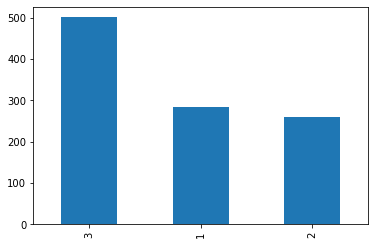

In [13]:
data['pclass'].value_counts().plot.bar()

<AxesSubplot:>

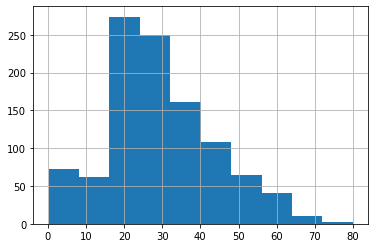

In [14]:
data['age'].hist()

In [15]:
# Une fonction tres utiles la fonction <<  groupby  >>>
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

### Serie et DataFrame

In [16]:
newdata = data.set_index('name') # remplacer l'index par  la colonne name
newdata['age'] # on a une serie

KeyError: "None of ['name'] are in the columns"

In [25]:
data['age'][0:3]

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [27]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [28]:
data[data['age'] < 18].groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

##### Les fonctions :: iloc  et ::loc

In [29]:
data.loc[0:2,'age']

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [30]:
data.iloc[0:2,0:2]

,pclass,survived
0,1,1
1,1,1


In [31]:
data.iloc[0:2] # mieux faire data.iloc[0:2, :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [47]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat' , 'body' , 'home.dest'],axis=1)
data

KeyError: "['name' 'sibsp' 'parch' 'ticket' 'fare' 'cabin' 'embarked' 'boat' 'body'\n 'home.dest'] not found in axis"

In [35]:
data['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
26.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: age, Length: 98, dtype: int64

In [51]:
# c'est feature engenering
data.loc[data['age'] <= 20 , 'age'] = 1
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 2
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 3
data.loc[data['age'] > 40, 'age'] = 4

In [52]:
data['age'].value_counts()

2.0    361
1.0    248
4.0    227
3.0    210
Name: age, dtype: int64

## La fonction Map et Apply

In [17]:
data['age'].map(lambda x:x+1)

0       30.0000
1        1.9167
2        3.0000
3       31.0000
4       26.0000
         ...   
1301    46.5000
1304    15.5000
1306    27.5000
1307    28.0000
1308    30.0000
Name: age, Length: 1046, dtype: float64

### la fonction Apply est comme la fonction map mais etendu a tout le DataFrame

### Change String to numeric

In [ ]:
data['sex'].map({'male':0,'female':1})
# Or
data['sex'].replace(['male','female'],[0,1])
# Or
data['sex'];astype('category').cat.codes
